In [1]:
# 1. make multiclass dataset

# 2. implement batch gradient descent.
#    - Batch gradient descent takes the total number of training examples
#      to estimate the error gradient.

# 3. one hot encode output variable

# 4. define model

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.datasets._samples_generator import make_blobs
from warnings import filterwarnings
filterwarnings('ignore')
plt.style.use('seaborn-whitegrid')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

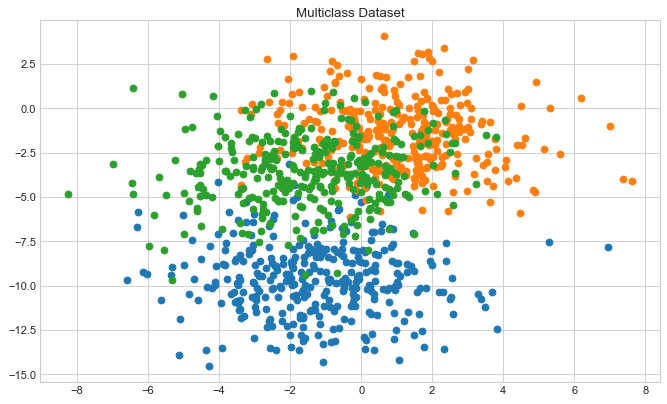

In [3]:
# generating 2d classification dataset
X, y = make_blobs(n_samples = 1000, n_features = 2, centers = 3, 
                  cluster_std = 2, random_state = 2)

plt.figure(figsize = (10, 6), dpi = 80)
plt.title("Multiclass Dataset", pad = -40)
for class_value in range(3) :
    row_ix = np.where(y == class_value)
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
plt.show()

In [4]:
# one hot encode output variable
y = to_categorical(y)

# split into train and test 
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [5]:
# define model
def creat_model(opt = SGD(learning_rate = .01, momentum = .9), 
                loss = "categorical_crossentropy", **kwargs) -> None :
    model = Sequential()
    model.add(Dense(50, input_dim = 2, activation = "relu", kernel_initializer = "he_uniform"))
    model.add(Dense(3, activation = "softmax"))
    # compile model 
    model.compile(loss = loss, optimizer = opt, metrics = ["accuracy"])
    return model

model = creat_model()


# fit the model
history = model.fit(trainX, trainy, validation_data = (testX, testy), epochs = 200, verbose = 0, 
                    batch_size = len(trainX))


# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose = 0)
_, test_acc = model.evaluate(testX, testy, verbose = 0)
print(f"train accuracy : {round(train_acc, 3)}  | test accuracy : {round(test_acc, 3)}")

train accuracy : 0.824  | test accuracy : 0.836


In [6]:
import pandas as pd
loss = pd.DataFrame(history.history)
loss.head()

,loss,accuracy,val_loss,val_accuracy
0,3.191638,0.274,2.156054,0.354
1,2.162445,0.374,2.740563,0.400
2,2.865283,0.388,2.295770,0.462
3,2.447053,0.446,1.284165,0.548
4,1.346418,0.506,2.132785,0.496


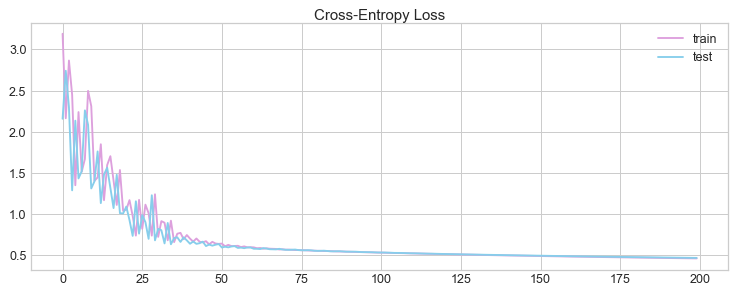

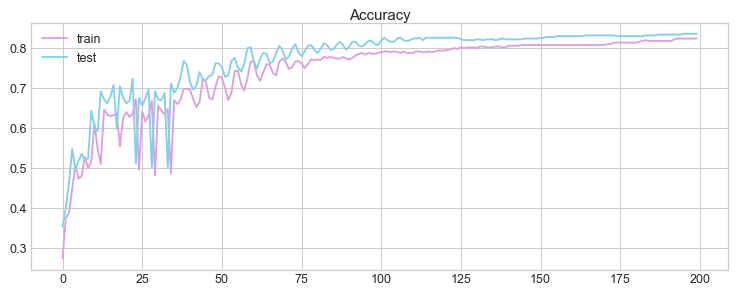

In [7]:
# plot loss learning curves
plt.figure(figsize = (10, 8), dpi = 90)
plt.subplot(211)
plt.title("Cross-Entropy Loss", pad = -40)
plt.plot(history.history["loss"], label = "train", color = "plum")
plt.plot(history.history["val_loss"], label = "test", color = "skyblue")
plt.legend()
plt.show()

# plot accuracy learning curves
plt.figure(figsize = (10, 8), dpi = 90)
plt.subplot(212)
plt.title("Accuracy", pad = -40)
plt.plot(history.history["accuracy"], label = "train", color = "plum")
plt.plot(history.history["val_accuracy"], label = "test", color = "skyblue")
plt.legend()
plt.show()

A line plot of model loss and classification accuracy on the train (blue) and test (orange)
dataset is created. We can see that the model is relatively slow to learn this problem, converging
on a solution after about 100 epochs after which changes in model performance are _minor_.